In [1]:
import pandas as pd

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Make sure wide DataFrames don't wrap
pd.set_option("display.width", None)

# Show the full content of each column (no '...')
pd.set_option("display.max_colwidth", None)

In [2]:
file_path = r"C:\Users\Arunkumara\Downloads\DRGHistoricalReviewInformation_11182025.txt"

df_hist = pd.read_csv(file_path, sep='|', dtype=str, low_memory=False)

print(df_hist.info())
df_hist.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886092 entries, 0 to 886091
Columns: 282 entries, Payor to AdjustedSavings
dtypes: object(282)
memory usage: 1.9+ GB
None


,Payor,claimid,Client,Control_ID,Claim_Number,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,LOS,DISP_Code,ADRG,DischargeYear,DischargeMonth,AGE,A_CCCount,A_MCCCount,B_CCCount,B_MCCCount,LOB,MRREQ,MRREC,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_POA,A_POA2,A_POA3,A_POA4,A_POA5,A_POA6,A_POA7,A_POA8,A_POA9,A_POA10,A_POA11,A_POA12,A_POA13,A_POA14,A_POA15,A_POA16,A_POA17,A_POA18,A_POA19,A_POA20,A_POA21,A_POA22,A_POA23,A_POA24,A_POA25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,B_DISPCode,B_DenialCode,B_DRG,B_PRIMDX,B_DX2,B_DX3,B_DX4,B_DX5,B_DX6,B_DX7,B_DX8,B_DX9,B_DX10,B_DX11,B_DX12,B_DX13,B_DX14,B_DX15,B_DX16,B_DX17,B_DX18,B_DX19,B_DX20,B_DX21,B_DX22,B_DX23,B_DX24,B_DX25,B_POA,B_POA2,B_POA3,B_POA4,B_POA5,B_POA6,B_POA7,B_POA8,B_POA9,B_POA10,B_POA11,B_POA12,B_POA13,B_POA14,B_POA15,B_POA16,B_POA17,B_POA18,B_POA19,B_POA20,B_POA21,B_POA22,B_POA23,B_POA24,B_POA25,B_PX1,B_PX2,B_PX3,B_PX4,B_PX5,B_PX6,B_PX7,B_PX8,B_PX9,B_PX10,B_PX11,B_PX12,B_PX13,B_PX14,B_PX15,B_PX16,B_PX17,B_PX18,B_PX19,B_PX20,B_PX21,B_PX22,B_PX23,B_PX24,B_PX25,A_PRIMDX_Desc,A_DX2_Desc,A_DX3_Desc,A_DX4_Desc,A_DX5_Desc,A_DX6_Desc,A_DX7_Desc,A_DX8_Desc,A_DX9_Desc,A_DX10_Desc,A_DX11_Desc,A_DX12_Desc,A_DX13_Desc,A_DX14_Desc,A_DX15_Desc,A_DX16_Desc,A_DX17_Desc,A_DX18_Desc,A_DX19_Desc,A_DX20_Desc,A_DX21_Desc,A_DX22_Desc,A_DX23_Desc,A_DX24_Desc,A_DX25_Desc,A_PX1_Desc,A_PX2_Desc,A_PX3_Desc,A_PX4_Desc,A_PX5_Desc,A_PX6_Desc,A_PX7_Desc,A_PX8_Desc,A_PX9_Desc,A_PX10_Desc,A_PX11_Desc,A_PX12_Desc,A_PX13_Desc,A_PX14_Desc,A_PX15_Desc,A_PX16_Desc,A_PX17_Desc,A_PX18_Desc,A_PX19_Desc,A_PX20_Desc,A_PX21_Desc,A_PX22_Desc,A_PX23_Desc,A_PX24_Desc,A_PX25_Desc,B_PRIMDX_Desc,B_DX2_Desc,B_DX3_Desc,B_DX4_Desc,B_DX5_Desc,B_DX6_Desc,B_DX7_Desc,B_DX8_Desc,B_DX9_Desc,B_DX10_Desc,B_DX11_Desc,B_DX12_Desc,B_DX13_Desc,B_DX14_Desc,B_DX15_Desc,B_DX16_Desc,B_DX17_Desc,B_DX18_Desc,B_DX19_Desc,B_DX20_Desc,B_DX21_Desc,B_DX22_Desc,B_DX23_Desc,B_DX24_Desc,B_DX25_Desc,B_PX1_Desc,B_PX2_Desc,B_PX3_Desc,B_PX4_Desc,B_PX5_Desc,B_PX6_Desc,B_PX7_Desc,B_PX8_Desc,B_PX9_Desc,B_PX10_Desc,B_PX11_Desc,B_PX12_Desc,B_PX13_Desc,B_PX14_Desc,B_PX15_Desc,B_PX16_Desc,B_PX17_Desc,B_PX18_Desc,B_PX19_Desc,B_PX20_Desc,B_PX21_Desc,B_PX22_Desc,B_PX23_Desc,B_PX24_Desc,B_PX25_Desc,InitialDeterminationDate,InitialDenialType,InitialDeterminationStatus,IDSavings,AdjustedSavings
0,UHC CSP,758656,NY,EXPR101623-340919,23N652771000,PrePay,01,15948.41,141340054,000334584002,ST LUKES CORNWALL HOSPITAL,9,02-TRNSF ACUTE CARE FAC,432,2023,9,69,2,2,2,2,NYCARE,2023-10-17 16:38:04.687000000,2023-11-08 00:00:00,K7030,I8511 - MCC,N170 - MCC,K766 - CC,D62 - CC,E119,K7682,F1010,I10,E039,Z794,K3189,E785,Z20822,Z87891,Z7984,Z751,Z741,Z7409,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,,Y,Y,Y,,,,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,30233N1,06L38CZ,06L38CZ,0BH17EZ,5A1945Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-TRNSF ACUTE CARE FAC,NaN,432,K7030,I8511 - MCC,N170 - MCC,K766 - CC,D62 - CC,E119,K7682,F1010,I10,E039,Z794,K3189,E785,Z20822,Z87891,Z7984,Z751,Z741,Z7409,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,NaN,Y,Y,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,30233N1,06L38CZ,06L38CZ,0BH17EZ,5A1945Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alcoholic cirrhosis of liver without ascites,Secondary esophageal varices with bleeding,Acute kidney failure with tubular necrosis,Portal hypertension,Acute posthemorrhagic anemia,Type 2 diabetes mellitus without complications,Hepatic encephalopathy,"Alcohol abuse, uncomplicated",Essential (primary) hypertension,"Hypothyroidism, unspecified",Long term (current) use of insulin,Other diseases of stomach and duodenum,"Hyperlipidemia, unspecified",Contact with and (suspected) exposure to COVID-19,Personal his

In [5]:
df1 = df_hist[df_hist['Client']=='Hum']

df1['PaymentType'] = df1['PaymentType'].str.strip().str.lower()

print(df1['InitialDenialType'].value_counts())

df1 = df1[(df1["InitialDeterminationStatus"].isin(["Approved", "Denied"])) & (df1["InitialDenialType"] == "Substantive")]

cols_to_drop = [
    'claimid', 'Control_ID', 'Claim_Number', 'Tax_ID',
    'DISP_Code', 'DischargeYear', 'DischargeMonth',
    'MRREQ', 'MRREC', 
    'InitialDeterminationDate', 'InitialDenialType',
    
]

df1 = df1.drop(columns=cols_to_drop, errors='ignore')


adx_cols = [f"A_DX{i}" for i in range(2, 26)]
apx_cols = [f"A_PX{i}" for i in range(1, 26)]
bdx_cols = [f"B_DX{i}" for i in range(2, 26)]
bpx_cols = [f"B_PX{i}" for i in range(1, 26)]

df1["A_DX_List"] = df1[adx_cols].values.tolist()
df1["A_PX_List"] = df1[apx_cols].values.tolist()
df1["B_DX_List"] = df1[bdx_cols].values.tolist()
df1["B_PX_List"] = df1[bpx_cols].values.tolist()


df1["A_DX_List"] = df1["A_DX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))
df1["A_PX_List"] = df1["A_PX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))
df1["B_DX_List"] = df1["B_DX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))
df1["B_PX_List"] = df1["B_PX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))


columns_to_keep = [
    "Payor", "Client", "PaymentType", "Group_Type", "Payments",
    "Provider_ID", "HospitalName", "LOS", "ADRG", "AGE", "LOB",
    "PRIM_DX", "B_DRG", "B_PRIMDX",
    "InitialDeterminationStatus", "IDSavings", "AdjustedSavings",
    "A_DX_List", "A_PX_List", "B_DX_List", "B_PX_List"
]

df2 = df1[columns_to_keep]

def clean_sdx_list(lst):
    cleaned = []
    for item in lst:
        item = str(item).upper().strip()               # normalize
        item = item.replace("- MCC", "")               # remove MCC
        item = item.replace("- CC", "")                # remove CC
        item = item.replace("MCC", "")                 # safety
        item = item.replace("CC", "")                  # safety
        cleaned.append(item.strip().replace("-", ""))  # final cleanup
    return cleaned
df2["A_DX_List_Clean"] = df2["A_DX_List"].apply(clean_sdx_list)
df2["B_DX_List_Clean"] = df2["B_DX_List"].apply(clean_sdx_list)


def clean_dx_code(x):
    if pd.isna(x):
        return ""
    
    # Convert to string and normalize
    x = str(x).upper().strip()
    
    # Remove square brackets if any
    x = x.replace("[", "").replace("]", "")
    
    # Remove MCC / CC suffixes
    x = x.replace("- MCC", "").replace("- CC", "")
    x = x.replace("MCC", "").replace("CC", "")
    
    # Remove leftover hyphens
    x = x.replace("-", "")
    
    return x
df2["B_PRIMDX_Clean"] = df2["B_PRIMDX"].apply(clean_dx_code)

# ---------------------------------------------------------
# Step 1: Load MCC/CC Mapping File
# ---------------------------------------------------------
mccandcclist_df = pd.read_excel(r"C:\Users\Arunkumara\Downloads\MCCCCList (1).xlsx")
mccandcclist_df['ICDCode'] = (
    mccandcclist_df['ICDCode']
    .astype(str)
    .str.strip()
    .str.upper()
)
mccandcclist = dict(zip(mccandcclist_df['ICDCode'], mccandcclist_df['MCCorCC']))
print(f"✅ Loaded MCC/CC list with {len(mccandcclist)} entries.")
mccandcclist_df.head()


def map_sdx_types(icd_list, lookup_dict):
    cleaned_list = []
    for code in icd_list:
        code_clean = str(code).strip().upper()  # normalize

        tag = lookup_dict.get(code_clean, "")  # MCC / CC / General
        cleaned_list.append(f"{code_clean} - {tag}")

    return cleaned_list

df2['A_DX_Type_list'] = df2['A_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))
df2['B_DX_Type_list'] = df2['B_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))


def extract_sdx_info(sdx_list):
    # Separate entries by type
    mcc = [x.split(" - ")[0] for x in sdx_list if "- MCC" in x]
    cc  = [x.split(" - ")[0] for x in sdx_list if "- CC" in x]
    #general  = [x.split(" - ")[0] for x in sdx_list if "- General" in x]
    other = [x.split(" - ")[0] for x in sdx_list if "- MCC" not in x and "- CC" not in x  ]

    # Determine SDX_Type and SDX_Set
    if mcc:
        return "MCC", mcc
    elif cc:
        return "CC", cc
    #elif general:
       # return "General", general
    
    else:
        return "General", other
    
# Apply the logic
df2[["A_DX_Type", "A_DX_Set"]] = df2["A_DX_Type_list"].apply(lambda x: pd.Series(extract_sdx_info(x)))

df2[["B_DX_Type", "B_DX_Set"]] = df2["B_DX_Type_list"].apply(lambda x: pd.Series(extract_sdx_info(x)))

# condition: SDX_Set empty AND SDX_Type == "General"
mask = (df2['A_DX_Set'].apply(lambda x: len(x) == 0)) & (df2['A_DX_Type'] == 'General')
mask = (df2['B_DX_Set'].apply(lambda x: len(x) == 0)) & (df2['B_DX_Type'] == 'General')
# update SDX_Type
df2.loc[mask, 'A_DX_Type'] = 'No A_DX'
df2.loc[mask, 'B_DX_Type'] = 'No B_DX'

df2["A_PX_count"]  = df2["A_PX_List"].apply(lambda x: len([i for i in x if pd.notna(i)]))
df2["B_PX_count"]  = df2["B_PX_List"].apply(lambda x: len([i for i in x if pd.notna(i)]))

df2["A_DX_Count"] = df2["A_DX_Set"].apply(lambda x: len([i for i in x if pd.notna(i)]))
df2["B_DX_Count"] = df2["B_DX_Set"].apply(lambda x: len([i for i in x if pd.notna(i)]))

cols_to_drop = [
    "A_DX_List", "B_DX_List",
    "A_DX_List_Clean", "B_DX_List_Clean",
    "A_DX_Type_list", "B_DX_Type_list"
]

df2 = df2.drop(columns=cols_to_drop, errors='ignore')

def compare_dx_sets(a, b):
    # Convert to string so list formatting does not matter
    a_str = str(a).strip()
    b_str = str(b).strip()

    if a_str == b_str:
        return "No Change"   # Or np.nan if you want blank
    else:
        return f"Change {a_str} → {b_str}"

df2["DX_Change_Status"] = df2.apply(lambda row: compare_dx_sets(row["PRIM_DX"], row["B_PRIMDX_Clean"]),axis=1)

df2 = df2.replace("No B_DX", "No A_DX")

df2["DX_Type_Status"] = df2.apply(lambda row: compare_dx_sets(row["A_DX_Type"], row["B_DX_Type"]),axis=1)

df2["DRG_Status"] = df2.apply(
    lambda row: compare_dx_sets(row["ADRG"], row["B_DRG"]),
    axis=1
)


def compare_dx_lists(a, b):
    # Handle None or NaN
    if a is None or (isinstance(a, float) and np.isnan(a)):
        a = []
    if b is None or (isinstance(b, float) and np.isnan(b)):
        b = []
    
    # Make sure both are lists
    if not isinstance(a, list):
        a = [a]
    if not isinstance(b, list):
        b = [b]
    
    # Normalize codes
    a_clean = [str(code).upper().strip() for code in a]
    b_clean = [str(code).upper().strip() for code in b]
    
    # Compare as sets (order-insensitive)
    if set(a_clean) == set(b_clean):
        return "No Change"
    else:
        return f"Change {a_clean} → {b_clean}"


# Apply to dataframe
df2["DX_Set_Change_Status"] = df2.apply(
    lambda row: compare_dx_lists(row["A_DX_Set"], row["B_DX_Set"]),
    axis=1
)

# Apply to dataframe
df2["PX_Set_Change_Status"] = df2.apply(
    lambda row: compare_dx_lists(row["A_PX_List"], row["B_PX_List"]),
    axis=1
)


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_14892\1745388048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PaymentType'] = df1['PaymentType'].str.strip().str.lower()


InitialDenialType
Substantive    64924
Name: count, dtype: int64


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_14892\1745388048.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["A_DX_List_Clean"] = df2["A_DX_List"].apply(clean_sdx_list)
C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_14892\1745388048.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["B_DX_List_Clean"] = df2["B_DX_List"].apply(clean_sdx_list)
C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_14892\1745388048.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

✅ Loaded MCC/CC list with 17913 entries.


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_14892\1745388048.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['A_DX_Type_list'] = df2['A_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))
C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_14892\1745388048.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['B_DX_Type_list'] = df2['B_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))
C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_14892\1745388048.py:129: SettingW

In [6]:
# Ensure numeric
df2['Payments'] = pd.to_numeric(df2['Payments'], errors='coerce')
df2['IDSavings'] = pd.to_numeric(df2['IDSavings'], errors='coerce')
df2.head()

,Payor,Client,PaymentType,Group_Type,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,LOB,PRIM_DX,B_DRG,B_PRIMDX,InitialDeterminationStatus,IDSavings,AdjustedSavings,A_PX_List,B_PX_List,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_PX_count,B_PX_count,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,PX_Set_Change_Status
1719,Strat,Hum,postpay,10,4277.47,593458145N,TAMPA GENERAL HOSPITAL,6,8613,60,MCD93,G893,8613,G893,Approved,0.0,0,[],[],G893,MCC,[A419],MCC,[A419],0,0,1,1,No Change,No Change,No Change,No Change,No Change
1720,Strat,Hum,postpay,10,9642.73,592616017M,UNIV OF MIAMI HOSP AND CLINICS,8,6953,40,MCD93,Z5111,6953,Z5111,Approved,0.0,0,"[009U3ZX, 3E0R305]","[009U3ZX, 3E0R305]",Z5111,MCC,[D61810],MCC,[D61810],2,2,1,1,No Change,No Change,No Change,No Change,No Change
1721,Strat,Hum,postpay,01,7815.43,000045770H,NOVANT HEALTH PRESBYTERIAN MED,9,189,76,MRO39,J9601,189,J9601 - MCC,Approved,0.0,0,[5A09357],[5A09357],J9601,MCC,"[E1110, I2609, I5023, J9602]",MCC,"[E1110, I2609, I5023, J9602]",1,1,4,4,No Change,No Change,No Change,No Change,No Change
1722,Strat,Hum,postpay,01,15539.61,001825011C,SPARTANBURG REGIONAL MEDICAL C,16,539,63,MEP3I,M4626,539,M4626 - CC,Approved,0.0,0,"[02HV33Z, 0K9N3ZZ, 0Q903ZZ]","[02HV33Z, 0K9N3ZZ, 0Q903ZZ]",M4626,MCC,"[G061, K6812]",MCC,"[G061, K6812]",3,3,2,2,No Change,No Change,No Change,No Change,No Change
1723,Strat,Hum,postpay,01,9020.75,381428164,MCLAREN OAKLAND,7,682,79,MER32,I120,682,I120 - CC,Approved,0.0,0,[5A1D70Z],[5A1D70Z],I120,MCC,[N186],MCC,[N186],1,1,1,1,No Change,No Change,No Change,No Change,No Change


In [9]:
cols_to_drop = [
    'Payor', 'Group_Type', 'B_PRIMDX', 'A_PX_List',
    'B_PX_List', 'A_PX_count', 'B_PX_count',
    'PX_Set_Change_Status','LOB',
    
]

df3 = df2.drop(columns=cols_to_drop, errors='ignore')

In [10]:
df3.head()

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status
1719,Hum,postpay,4277.47,593458145N,TAMPA GENERAL HOSPITAL,6,8613,60,G893,8613,Approved,0.0,0,G893,MCC,[A419],MCC,[A419],1,1,No Change,No Change,No Change,No Change
1720,Hum,postpay,9642.73,592616017M,UNIV OF MIAMI HOSP AND CLINICS,8,6953,40,Z5111,6953,Approved,0.0,0,Z5111,MCC,[D61810],MCC,[D61810],1,1,No Change,No Change,No Change,No Change
1721,Hum,postpay,7815.43,000045770H,NOVANT HEALTH PRESBYTERIAN MED,9,189,76,J9601,189,Approved,0.0,0,J9601,MCC,"[E1110, I2609, I5023, J9602]",MCC,"[E1110, I2609, I5023, J9602]",4,4,No Change,No Change,No Change,No Change
1722,Hum,postpay,15539.61,001825011C,SPARTANBURG REGIONAL MEDICAL C,16,539,63,M4626,539,Approved,0.0,0,M4626,MCC,"[G061, K6812]",MCC,"[G061, K6812]",2,2,No Change,No Change,No Change,No Change
1723,Hum,postpay,9020.75,381428164,MCLAREN OAKLAND,7,682,79,I120,682,Approved,0.0,0,I120,MCC,[N186],MCC,[N186],1,1,No Change,No Change,No Change,No Change


In [11]:
df3['InitialDeterminationStatus'].value_counts()

InitialDeterminationStatus
Approved    56906
Denied       8018
Name: count, dtype: int64

# Clustering

In [6]:
df3['A_DX_Set'] = df3['A_DX_Set'].apply(
    lambda x: tuple(sorted([str(i).strip().upper() for i in x])) 
              if isinstance(x, list) else tuple()
)

df3['B_DX_Set'] = df3['B_DX_Set'].apply(
    lambda x: tuple(sorted([str(i).strip().upper() for i in x])) 
              if isinstance(x, list) else tuple()
)

In [136]:
df3.head()

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,LOB,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status
1719,Hum,postpay,4277.47,593458145N,TAMPA GENERAL HOSPITAL,6,8613,60,MCD93,G893,8613,Approved,0.0,0,G893,MCC,"(A419,)",MCC,"(A419,)",1,1,No Change,No Change,No Change,No Change
1720,Hum,postpay,9642.73,592616017M,UNIV OF MIAMI HOSP AND CLINICS,8,6953,40,MCD93,Z5111,6953,Approved,0.0,0,Z5111,MCC,"(D61810,)",MCC,"(D61810,)",1,1,No Change,No Change,No Change,No Change
1721,Hum,postpay,7815.43,000045770H,NOVANT HEALTH PRESBYTERIAN MED,9,189,76,MRO39,J9601,189,Approved,0.0,0,J9601,MCC,"(E1110, I2609, I5023, J9602)",MCC,"(E1110, I2609, I5023, J9602)",4,4,No Change,No Change,No Change,No Change
1722,Hum,postpay,15539.61,001825011C,SPARTANBURG REGIONAL MEDICAL C,16,539,63,MEP3I,M4626,539,Approved,0.0,0,M4626,MCC,"(G061, K6812)",MCC,"(G061, K6812)",2,2,No Change,No Change,No Change,No Change
1723,Hum,postpay,9020.75,381428164,MCLAREN OAKLAND,7,682,79,MER32,I120,682,Approved,0.0,0,I120,MCC,"(N186,)",MCC,"(N186,)",1,1,No Change,No Change,No Change,No Change


In [7]:
import re
import pandas as pd

def extract_unique_icd(df, col_name="dummy"):
    unique_icd = set()
    invalid_entries = []  # store invalid values with row index for inspection

    for idx, val in df[col_name].items():
        icd_list = []

        # ✅ Case 1: already a tuple
        if isinstance(val, tuple):
            icd_list = val

        # ✅ Case 2: comma-separated string
        elif isinstance(val, str):
            icd_list = tuple(val.split(","))

        # 🚫 Case 3: invalid type
        else:
            invalid_entries.append({"index": idx, "invalid_value": val})
            continue

        # 🔥 Clean + strip + uppercase each ICD code
        cleaned = [
            re.sub(r"[^A-Za-z0-9.\-]", "", str(icd).strip()).upper()
            for icd in icd_list
            if str(icd).strip()  # not empty
        ]

        unique_icd.update(cleaned)

    # ✅ Create DataFrame for valid ICDs
    unique_icd_df = pd.DataFrame(sorted(unique_icd), columns=["Unique_ICD"])
    unique_icd_df = unique_icd_df[
        unique_icd_df["Unique_ICD"].astype(str).str.strip() != ""
    ].reset_index(drop=True)

    # ⚠️ Invalid entries
    invalid_df = pd.DataFrame(invalid_entries)

    return unique_icd_df, invalid_df



# ✅ Example usage:
unique_icd_df, invalid_df = extract_unique_icd(df3, "A_DX_Set")
unique_icd_df1, invalid_df1 = extract_unique_icd(df3, "B_DX_Set")

# ✅ Strip spaces and get unique values (for another column like PRIM_DX)
unique_values = df3['PRIM_DX'].astype(str).str.strip().str.upper().unique()
unique_values1 = df3['B_PRIMDX_Clean'].astype(str).str.strip().str.upper().unique()


# ✅ Convert to a DataFrame
unique_df = pd.DataFrame(unique_values, columns=['Unique_ICD']) 
unique_df1 = pd.DataFrame(unique_values, columns=['Unique_ICD']) 

# 2️⃣ Concatenate and drop duplicates
union_df2 = pd.concat([unique_icd_df,unique_icd_df1, unique_df,unique_df1], ignore_index=True).drop_duplicates().reset_index(drop=True)

union_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unique_ICD  5747 non-null   object
dtypes: object(1)
memory usage: 45.0+ KB


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
pretrained_embedding = pd.read_json("hf://datasets/attuneengineering/ICD_10_Embedding_Collection/ICD_10_embedding_collection.json")
#print(pretrained_embedding.info())
#pretrained_embedding.head()

# Create new DataFrame with only the 3 columns
df_pretrained = pretrained_embedding[['id', 'embedding']].copy()
df_pretrained['id'] = df_pretrained['id'].astype(str).str.strip().str.upper()

In [10]:
union_df = union_df2.merge(df_pretrained,how='left',left_on='Unique_ICD',right_on='id')
# Replace NaN with list of 512 zeros
union_df['embedding'] = union_df['embedding'].apply(
    lambda x: [0.0]*512 if isinstance(x, float) and pd.isna(x) else x
)
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unique_ICD  5747 non-null   object
 1   id          5701 non-null   object
 2   embedding   5747 non-null   object
dtypes: object(3)
memory usage: 134.8+ KB


In [140]:
nan = union_df[union_df['id'].isna()]
nan.head()

,Unique_ICD,id,embedding
319,C83390,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]"
320,C833A,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]"
334,C8800,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]"
335,C8840,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]"
593,E66811,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]"


In [141]:
nan_list = nan['Unique_ICD'].dropna().unique().tolist()
nan_list


['C83390',
 'C833A',
 'C8800',
 'C8840',
 'E66811',
 'E66812',
 'E66813',
 'E872',
 'E8881',
 'F0151',
 'F0281',
 'F0391',
 'G20',
 'I248',
 'I313',
 'I471',
 'I472',
 'J156',
 'K3520',
 'K3521',
 'M51360',
 'M51369',
 'M51370',
 'M65961',
 'M6598',
 'Q211',
 'R00',
 'Z1721',
 'Z1722',
 'Z298',
 'Z4452',
 'Z5971',
 'Z860100',
 'Z860101',
 'Z860109',
 'Z9114',
 'I714',
 'Z7981',
 'Z877',
 'Z9119',
 'I7101',
 'G92',
 'I712',
 'C83398',
 'M65942',
 'T81321A']

In [11]:
#check_list = ["E1110", "I2609", "I5023", "J9602"]

# 1️⃣ PRIM_DX match (single string)
df_1 = df3[df3['PRIM_DX'].isin(nan_list)]

# 2️⃣ B_PRIMDX_Clean match (single string)
df_2 = df3[df3['B_PRIMDX_Clean'].isin(nan_list)]

# 3️⃣ A_DX_Set match (tuple/list)
df_3 = df3[
    df3['A_DX_Set'].apply(
        lambda x: any(item in nan_list for item in x) if isinstance(x, (list, tuple)) else False
    )
]

# 3️⃣ A_DX_Set match (tuple/list)
df_4 = df3[
    df3['B_DX_Set'].apply(
        lambda x: any(item in nan_list for item in x) if isinstance(x, (list, tuple)) else False
    )
]

# 4️⃣ Combine all matched rows
filtered_df = pd.concat([df_1, df_2, df_3,df_4]).drop_duplicates().reset_index(drop=True)
filtered_df.info()

NameError: name 'nan_list' is not defined

In [12]:
# Ensure embeddings are np.array type
union_df['embedding'] = union_df['embedding'].apply(np.array)

# Create ICD → embedding dictionary
icd_to_emb = dict(zip(union_df['Unique_ICD'], union_df['embedding']))

In [13]:
import numpy as np
import ast

# ---------------------------------------
# Helper: return embedding or zero vector
# ---------------------------------------
def get_embedding(code, icd_to_emb, embedding_dim=512):
    if code in icd_to_emb:
        return icd_to_emb[code]
    else:
        return np.zeros(embedding_dim)

# ---------------------------------------
# Map SDX list → list of embeddings
# ---------------------------------------
def map_icd_embeddings(icd_list, icd_to_emb, embedding_dim=512):
    # Convert tuple → list
    icd_list = list(icd_list)

    # Return list of embeddings (each 512-dim)
    return [
        get_embedding(c, icd_to_emb, embedding_dim)
        for c in icd_list
    ]

embedding_dim = 512

# ---------------------------------------
# Apply to dataframe
# ---------------------------------------
df3['A_DX_Set_embeddings'] = df3['A_DX_Set'].apply(
    lambda codes: map_icd_embeddings(codes, icd_to_emb, embedding_dim)
)

df3['B_DX_Set_embeddings'] = df3['B_DX_Set'].apply(
    lambda codes: map_icd_embeddings(codes, icd_to_emb, embedding_dim)
)

df3['A_PRIM_DX_emb'] = df3['PRIM_DX'].apply(
    lambda code: get_embedding(code, icd_to_emb, embedding_dim)
)

df3['B_PRIM_DX_emb'] = df3['B_PRIMDX_Clean'].apply(
    lambda code: get_embedding(code, icd_to_emb, embedding_dim)
)

print(df3.info())
df3.head(1)


<class 'pandas.core.frame.DataFrame'>
Index: 64924 entries, 1719 to 886078
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      64924 non-null  object 
 1   PaymentType                 64924 non-null  object 
 2   Payments                    64924 non-null  float64
 3   Provider_ID                 64924 non-null  object 
 4   HospitalName                64924 non-null  object 
 5   LOS                         64924 non-null  object 
 6   ADRG                        64924 non-null  object 
 7   AGE                         64924 non-null  object 
 8   LOB                         64924 non-null  object 
 9   PRIM_DX                     64924 non-null  object 
 10  B_DRG                       64705 non-null  object 
 11  InitialDeterminationStatus  64924 non-null  object 
 12  IDSavings                   64924 non-null  float64
 13  AdjustedSavings             6492

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,LOB,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,A_DX_Set_embeddings,B_DX_Set_embeddings,A_PRIM_DX_emb,B_PRIM_DX_emb
1719,Hum,postpay,4277.47,593458145N,TAMPA GENERAL HOSPITAL,6,8613,60,MCD93,G893,8613,Approved,0.0,0,G893,MCC,"(A419,)",MCC,"(A419,)",1,1,No Change,No Change,No Change,No Change,"[[-0.030134443193674, -0.006221577525138001, 0.043377045542001, 0.06008078157901701, -0.065611071884632, -0.017211619764566, 0.02200830169022, -0.034931123256683, -0.025601109489798, -0.033990599215030004, 0.034912314265966006, -0.031714525073766, -0.007886308245360001, -0.011756571009755001, 0.036661691963672, -0.052895165979862005, -0.015057816170156, -0.043489910662174, -0.07584398984909001, -0.0019762795418500003, 0.011530845426023001, 0.009330014698207, 0.017926419153809003, 0.0034352701622990004, 0.013195576146245001, -0.045333340764045, -0.0019045645603910002, 0.015330568887293, -0.041608858853578005, 0.014766253530979, 0.06290236115455601, -0.049057822674512, 0.025525867938995, 0.030529463663697003, -0.020747996866703002, 0.041909825056791, -0.025808025151491002, 0.025996129959821004, -0.10353306680917701, 0.028309823945164, 0.021951870992779003, -0.044242329895496, -0.077499315142631, 0.034818261861801, -0.053910933434963004, 0.004726141691207, -0.0056384517811230005, -0.11293832957744501, 0.070276081562042, -0.009913140907883, -0.014023238793015001, -0.029983960092067004, 0.037113144993782, 0.09578313678503, 0.09465450793504701, 0.007035132497549001, -0.037376493215560004, 0.113841228187084, -0.041383132338523004, -0.027632646262645003, -0.018359061330556002, -0.043527528643608, -0.035043988376855004, -0.036511208862066005, 0.055001944303512004, -0.063654780387878, -0.015123653225600001, 0.08810845017433101, -0.04555906355381, -0.008347165770828, -0.093751601874828, -0.030774001032114, -0.11000388860702501, 0.020729186013340003, 0.013214386068284002, 0.017258645966649, 0.0028192258905610002, -0.053459480404853, 0.014615769498050001, -0.0013872754061590002, -0.0060334722511470006, 0.002687552245333, 0.004871923010796001, -0.0015154220163820001, -0.057296827435493004, -0.0057325041852890005, -0.079154640436172, 0.00078416330507, -0.015951316803693, -0.0030966808553780003, -0.08073472976684501, 0.054174281656742006, -0.029758233577013002, -0.00037532852729700003, -0.021331124007701003, -0.031770959496498004, -0.029908716678619003, 0.018669435754418002, -0.059779815375804006, 0.004563901107758, ...]]","[[-0.030134443193674, -0.006221577525138001, 0.043377045542001, 0.06008078157901701, -0.065611071884632, -0.017211619764566, 0.02200830169022, -0.034931123256683, -0.025601109489798, -0.033990599215030004, 0.034912314265966006, -0.031714525073766, -0.007886308245360001, -0.011756571009755001, 0.036661691963672, -0.052895165979862005, -0.015057816170156, -0.043489910662174, -0.07584398984909001, -0.0019762795418500003, 0.011530845426023001, 0.009330014698207, 0.017926419153809003, 0.0034352701622990004, 0.013195576146245001, -0.045333340764045, -0.0019045645603910002, 0.015330568887293, -0.041608858853578005, 0.014766253530979, 0.06290236115455601, -0.049057822674512, 0.025525867938995, 0.030529463663697003, -0.020747996866703002, 0.041909825056791, -0.025808025151491002, 0.025996129959821004, -0.10353306680917701, 0.028309823945164, 0.021951870992779003, -0.044242329895496, -0.077499315142631, 0.034818261861801, -0.053910933434963004, 0.004726141691207, -0.0056384517811230005, -0.11293832957744501, 0.070276081562042, -0.009913140907883, -0.014023238793015001, -0.029983960092067004, 0.037113144993782, 0.09578313678503, 0.09465450793504701, 0.007035132497549001, -0.037376493215560004, 0.113841228187084, -0.041383132338523004, -0.027632646262645003, -0.018359061330556002, -0.043527528643608, -0.035043988376855004

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QueryAttentionPooling(nn.Module):
    def __init__(self, embedding_dim=512):
        super().__init__()
        self.query = nn.Parameter(torch.randn(embedding_dim))

    def forward(self, x):
        """
        x: tensor shape (N_codes, embedding_dim)
        returns: pooled vector (embedding_dim,)
        """
        if x.ndim == 1:
            return x

        q = F.normalize(self.query, dim=0)   # (D,)
        x_norm = F.normalize(x, dim=1)       # (N, D)

        scores = torch.matmul(x_norm, q)      # (N,)
        weights = F.softmax(scores, dim=0)    # (N,)

        pooled = torch.sum(x * weights.unsqueeze(1), dim=0)
        return pooled

att_layer = QueryAttentionPooling(embedding_dim=512)


In [15]:
def pool_sdx_attention(emb_list):
    if len(emb_list) == 0:
        return np.zeros(512)

    x = torch.tensor(np.vstack(emb_list), dtype=torch.float32)
    pooled = att_layer(x).detach().numpy()
    return pooled

df3['A_DX_agg_emb'] = df3['A_DX_Set_embeddings'].apply(pool_sdx_attention)
df3['B_DX_agg_emb'] = df3['B_DX_Set_embeddings'].apply(pool_sdx_attention)

In [ ]:
df3.head(1)

In [16]:
def compare_dx_sets(a, b):
    # Convert to string so list formatting does not matter
    a_str = str(a).strip()
    b_str = str(b).strip()

    if a_str == b_str:
        return "No Change"   # Or np.nan if you want blank
    else:
        return f"Change"

df3["Prim_DX_Change_Status"] = df3.apply(lambda row: compare_dx_sets(row["PRIM_DX"], row["B_PRIMDX_Clean"]),axis=1)

#df3 = df3.replace("No B_DX", "No A_DX")

df3["SDX_Type_ChangeStatus"] = df3.apply(lambda row: compare_dx_sets(row["A_DX_Type"], row["B_DX_Type"]),axis=1)

df3["DRG_Change_Status"] = df3.apply(
    lambda row: compare_dx_sets(row["ADRG"], row["B_DRG"]),
    axis=1
)


def compare_dx_lists(a, b):
    # Handle None or NaN
    if a is None or (isinstance(a, float) and np.isnan(a)):
        a = []
    if b is None or (isinstance(b, float) and np.isnan(b)):
        b = []
    
    # Make sure both are lists
    if not isinstance(a, list):
        a = [a]
    if not isinstance(b, list):
        b = [b]
    
    # Normalize codes
    a_clean = [str(code).upper().strip() for code in a]
    b_clean = [str(code).upper().strip() for code in b]
    
    # Compare as sets (order-insensitive)
    if set(a_clean) == set(b_clean):
        return "No Change"
    else:
        return f"Change"


# Apply to dataframe
df3["SDX_Set_Change_Status"] = df3.apply(
    lambda row: compare_dx_lists(row["A_DX_Set"], row["B_DX_Set"]),
    axis=1
)



In [17]:
cols_to_keep = [
    "Payments", "LOS", "AGE", "IDSavings",
    "Provider_ID", "ADRG", "PRIM_DX", "B_DRG", "B_PRIMDX_Clean",
    "InitialDeterminationStatus", "Prim_DX_Change_Status",
    "SDX_Type_ChangeStatus", "DRG_Change_Status", "SDX_Set_Change_Status",
    "B_PRIM_DX_emb", "A_PRIM_DX_emb",
    "A_DX_agg_emb", "B_DX_agg_emb"
]

df4 = df3[cols_to_keep].copy()
df4.head(1)


,Payments,LOS,AGE,IDSavings,Provider_ID,ADRG,PRIM_DX,B_DRG,B_PRIMDX_Clean,InitialDeterminationStatus,Prim_DX_Change_Status,SDX_Type_ChangeStatus,DRG_Change_Status,SDX_Set_Change_Status,B_PRIM_DX_emb,A_PRIM_DX_emb,A_DX_agg_emb,B_DX_agg_emb
1719,4277.47,6,60,0.0,593458145N,8613,G893,8613,G893,Approved,No Change,No Change,No Change,No Change,"[-0.036079041659832, 0.051918622106313005, 0.093488715589046, 0.026962483301758003, -0.012302072718739001, -0.015241195447742, 0.029532015323638004, -0.040725316852331, -0.001986547140404, 0.019693877547979, -0.06635023653507201, 0.04533639550209, -0.025519322603940003, 0.021541828289628, 0.0037091013509780004, 0.027472870424389003, 0.09714941680431301, -0.043646838515996, -0.022175410762429, 0.034864675253629004, 0.055051337927579005, 0.019025094807147, -0.015821980312466, -0.083069793879985, -0.012768460437655001, 0.058571245521306006, 0.000202532115508, 0.013754034414887002, 0.027525668963789003, 0.00027100529405200003, 0.009855737909674001, -0.024357752874493002, -0.008579771965742, -0.015161996707320002, -0.030587987974286003, 0.006001440342515, -0.086660094559192, 0.044139627367258, -0.029285622760653003, -0.021541828289628, 0.011131703853607, -0.018444310873746, 0.041746091097593, 0.085744924843311, -0.06853257864713601, -0.015241195447742, -0.074410825967788, -0.059064030647277006, 0.060155201703310006, -0.022509802132844002, -0.014546013437211002, 0.015505188144743002, 0.027948057278990003, 0.11714249104261301, -0.025184931233525002, 0.046181172132492, 0.0013815632555630002, 0.053678572177886005, -0.054734546691179005, -0.008100184611976001, -0.005205061752349, -0.087927266955375, 0.015443589538335, -0.06145756691694201, 0.011325298808515, -0.033544708043336, -0.07155969738960201, -0.014598811976611002, -0.014202822931110002, 0.015417190268635, -0.047694731503725, 0.007963788695633, 0.06888456642627701, 0.056424099951982006, 0.01024292781949, 0.012566066347062001, 0.059204827994108006, -0.007858191616833, -0.029461616650223003, 0.030253596603870003, 0.027578467503190002, 0.054734546691179005, 0.031027976423501004, -0.035656653344631, -0.083914570510387, 0.015443589538335, -0.10109171271324101, 0.026487296447157003, -0.015214796178042, 0.008729368448257, -0.024234555661678002, 0.020626651123166, 0.015575585886836002, 0.043470844626426, -0.005143463145941001, -0.043717239052057, -0.044210024178028, 0.000257530657108, -0.0049410685896870005, 0.072791665792465, ...]","[-0.036079041659832, 0.051918622106313005, 0.093488715589046, 0.026962483301758003, -0.012302072718739001, -0.015241195447742, 0.029532015323638004, -0.040725316852331, -0.001986547140404, 0.019693877547979, -0.06635023653507201, 0.04533639550209, -0.025519322603940003, 0.021541828289628, 0.0037091013509780004, 0.027472870424389003, 0.09714941680431301, -0.043646838515996, -0.022175410762429, 0.034864675253629004, 0.055051337927579005, 0.019025094807147, -0.015821980312466, -0.083069793879985, -0.012768460437655001, 0.058571245521306006, 0.000202532115508, 0.013754034414887002, 0.027525668963789003, 0.00027100529405200003, 0.009855737909674001, -0.024357752874493002, -0.008579771965742, -0.015161996707320002, -0.030587987974286003, 0.006001440342515, -0.086660094559192, 0.044139627367258, -0.029285622760653003, -0.021541828289628, 0.011131703853607, -0.018444310873746, 0.041746091097593, 0.085744924843311, -0.06853257864713601, -0.015241195447742, -0.074410825967788, -0.059064030647277006, 0.060155201703310006, -0.022509802132844002, -0.014546013437211002, 0.015505188144743002, 0.027948057278990003, 0.11714249104261301, -0.025184931233525002, 0.046181172132492, 0.0013815632555630002, 0.053678572177886005, -0.054734546691179005, -0.008100184611976001, -0.005205061752349, -0.087927266955375, 0.015443589538335, -0.06145756691694201, 0.011325298808515, -0.033544708043336, -0.07155969738960201, -0.014598811976611002, -0.014202822931110002, 0.015417190268635, -0.047694731503725, 0.007963788695633, 0.06888456642627701, 0.05642409

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt


# ---------------------------------------------------------------
# 1️⃣ Keep only your required columns
# ---------------------------------------------------------------
keep_cols = [
    "Payments", "LOS", "AGE", "IDSavings",
    "Provider_ID", "ADRG", "PRIM_DX", "B_DRG", "B_PRIMDX_Clean",
    "InitialDeterminationStatus", "Prim_DX_Change_Status",
    "SDX_Type_ChangeStatus", "DRG_Change_Status", "SDX_Set_Change_Status",
    "B_PRIM_DX_emb", "A_PRIM_DX_emb", 
    "A_DX_agg_emb", "B_DX_agg_emb"
]

df_model = df4[keep_cols].copy()

# ---------------------------------------------------------------
# 2️⃣ Expand embeddings (do NOT combine)
# ---------------------------------------------------------------
def expand_emb(col):
    return pd.DataFrame(df_model[col].tolist()).add_prefix(col + "_")

embed_cols = ["B_PRIM_DX_emb", "A_PRIM_DX_emb", "A_DX_agg_emb", "B_DX_agg_emb"]
expanded = [expand_emb(c) for c in embed_cols]
embed_df = pd.concat(expanded, axis=1)

# ---------------------------------------------------------------
# 3️⃣ Numeric columns
# ---------------------------------------------------------------
numeric_cols = ["Payments", "LOS", "AGE", "IDSavings"]
df_numeric = df_model[numeric_cols]

# ---------------------------------------------------------------
# 4️⃣ Categorical columns → One-Hot Encoding (binary)
# ---------------------------------------------------------------
categorical_cols = [
    "Provider_ID", "ADRG", "PRIM_DX", "B_DRG", "B_PRIMDX_Clean",
    "InitialDeterminationStatus", "Prim_DX_Change_Status",
    "SDX_Type_ChangeStatus", "DRG_Change_Status", "SDX_Set_Change_Status"
]

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_cat = ohe.fit_transform(df_model[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=ohe.get_feature_names_out(categorical_cols))

# ---------------------------------------------------------------
# 5️⃣ Build final feature matrix
# ---------------------------------------------------------------
combined_features = pd.concat([df_numeric, encoded_cat_df, embed_df], axis=1)
combined_features = combined_features.fillna(0)

# 1️⃣ Scale first
# ----------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_features)

# ----------------------------------------------
# 2️⃣ DIMENSION REDUCTION (HUGE SPEED BOOST)
# PCA to keep 95% variance
# ----------------------------------------------
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original dims:", X_scaled.shape[1])
print("Reduced dims:", X_pca.shape[1])



In [ ]:
# ----------------------------------------------
# 3️⃣ FAST elbow using MiniBatch KMeans
# ----------------------------------------------
K_range = range(2, 10)
inertia_scores = []

for k in K_range:
    mbk = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        batch_size=512,
        max_iter=100
    )
    mbk.fit(X_pca)
    inertia_scores.append(mbk.inertia_)

# ----------------------------------------------
# 4️⃣ Plot elbow
# ----------------------------------------------
plt.plot(K_range, inertia_scores, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("FAST Elbow Method (PCA + MiniBatchKMeans)")
plt.grid(True)
plt.show()

# ----------------------------------------------
# 5️⃣ Best K = point where slope reduces most
# ----------------------------------------------
best_k = K_range[np.argmin(np.gradient(np.gradient(inertia_scores)))]
print(f"\n✅ Optimal K (fast method): {best_k}")


In [ ]:
# ---------------------------------------------------------------
# 0️⃣ Import libraries
# ---------------------------------------------------------------
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# ---------------------------------------------------------------
# 1️⃣ Keep only your required columns
# ---------------------------------------------------------------
keep_cols = [
    "Payments", "LOS", "AGE", "IDSavings",
    "Provider_ID", "ADRG", "PRIM_DX", "B_DRG", "B_PRIMDX_Clean",
    "InitialDeterminationStatus", "Prim_DX_Change_Status",
    "SDX_Type_ChangeStatus", "DRG_Change_Status", "SDX_Set_Change_Status",
    "B_PRIM_DX_emb", "A_PRIM_DX_emb", 
    "A_DX_agg_emb", "B_DX_agg_emb"
]

df_model = df3[keep_cols].copy()

# ---------------------------------------------------------------
# 2️⃣ Expand embeddings (do NOT combine)
# ---------------------------------------------------------------
def expand_emb(col):
    return pd.DataFrame(df_model[col].tolist()).add_prefix(col + "_")

embed_cols = ["B_PRIM_DX_emb", "A_PRIM_DX_emb", "A_DX_agg_emb", "B_DX_agg_emb"]
expanded = [expand_emb(c) for c in embed_cols]
embed_df = pd.concat(expanded, axis=1)

# ---------------------------------------------------------------
# 3️⃣ Numeric columns
# ---------------------------------------------------------------
numeric_cols = ["Payments", "LOS", "AGE", "IDSavings"]
df_numeric = df_model[numeric_cols]

# ---------------------------------------------------------------
# 4️⃣ Categorical columns → One-Hot Encoding (binary)
# ---------------------------------------------------------------
categorical_cols = [
    "Provider_ID", "ADRG", "PRIM_DX", "B_DRG", "B_PRIMDX_Clean",
    "InitialDeterminationStatus", "Prim_DX_Change_Status",
    "SDX_Type_ChangeStatus", "DRG_Change_Status", "SDX_Set_Change_Status"
]

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_cat = ohe.fit_transform(df_model[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=ohe.get_feature_names_out(categorical_cols))

# ---------------------------------------------------------------
# 5️⃣ Build final feature matrix
# ---------------------------------------------------------------
combined_features = pd.concat([df_numeric, encoded_cat_df, embed_df], axis=1)
combined_features = combined_features.fillna(0)

# ---------------------------------------------------------------
# 6️⃣ Scale numeric + encoded + embedding features
# ---------------------------------------------------------------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_features)

# ---------------------------------------------------------------
# 7️⃣ Optimal K using KMeans + Yellowbrick
# ---------------------------------------------------------------
print("\n🔍 Finding optimal K using Elbow method (numeric + categorical + embeddings)...")

model_k = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_k, k=(2, 15))
visualizer.fit(scaled_features)
visualizer.show()

best_k = visualizer.elbow_value_
print(f"\n✅ Optimal number of clusters (Elbow): {best_k}")


In [ ]:
pip install yellowbrick

In [159]:
# ---------------------------------------------------------------------
# 1. START WITH YOUR DATAFRAME
# ---------------------------------------------------------------------
df = df4.copy()

# ---------------------------------------------------------------------
# 2. EXPAND ALL EMBEDDING VECTORS (FAST, NO FRAGMENTATION)
# ---------------------------------------------------------------------

# B PRIM DX embedding
emb_b_prim = np.vstack(df["B_PRIM_DX_emb"].values)
df_b_prim = pd.DataFrame(
    emb_b_prim,
    columns=[f"B_PRIM_emb_{i}" for i in range(emb_b_prim.shape[1])]
)

# A PRIM DX embedding
emb_a_prim = np.vstack(df["A_PRIM_DX_emb"].values)
df_a_prim = pd.DataFrame(
    emb_a_prim,
    columns=[f"A_PRIM_emb_{i}" for i in range(emb_a_prim.shape[1])]
)

# A DX aggregated embedding
emb_a_dx = np.vstack(df["A_DX_agg_emb"].values)
df_a_dx = pd.DataFrame(
    emb_a_dx,
    columns=[f"A_DX_emb_{i}" for i in range(emb_a_dx.shape[1])]
)

# B DX aggregated embedding
emb_b_dx = np.vstack(df["B_DX_agg_emb"].values)
df_b_dx = pd.DataFrame(
    emb_b_dx,
    columns=[f"B_DX_emb_{i}" for i in range(emb_b_dx.shape[1])]
)

# Merge all embedding columns at once
df = pd.concat([df, df_b_prim, df_a_prim, df_a_dx, df_b_dx], axis=1).copy()

# ---------------------------------------------------------------------
# 3. DEFINE YOUR FEATURES
# ---------------------------------------------------------------------

num_features = ["Payments", "LOS", "AGE", "IDSavings"]

cat_features = [
    "Provider_ID", "ADRG", "PRIM_DX",
    "B_DRG", "B_PRIMDX_Clean"
]

binary_features = [
    "InitialDeterminationStatus",
    "Prim_DX_Change_Status",
    "SDX_Type_ChangeStatus",
    "DRG_Change_Status",
    "SDX_Set_Change_Status"
]

# All embedding columns
embedding_cols = (
    [col for col in df.columns if col.startswith("B_PRIM_emb_")] +
    [col for col in df.columns if col.startswith("A_PRIM_emb_")] +
    [col for col in df.columns if col.startswith("A_DX_emb_")] +
    [col for col in df.columns if col.startswith("B_DX_emb_")]
)

# Final feature list
feature_cols = num_features + cat_features + binary_features + embedding_cols

print("Total Features:", len(feature_cols))
print("Embedding Features:", len(embedding_cols))



Total Features: 2062
Embedding Features: 2048


# dENIED

In [43]:
cols = ["DX_Change_Status", "DX_Type_Status", "DX_Set_Change_Status", "PX_Set_Change_Status","DRG_Status"]
df5 = df2[~(df2[cols] == "No Change").all(axis=1)].copy()
df5.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9030 entries, 33870 to 886028
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Payor                       9030 non-null   object 
 1   Client                      9030 non-null   object 
 2   PaymentType                 9030 non-null   object 
 3   Group_Type                  9027 non-null   object 
 4   Payments                    9030 non-null   float64
 5   Provider_ID                 9030 non-null   object 
 6   HospitalName                9030 non-null   object 
 7   LOS                         9030 non-null   object 
 8   ADRG                        9030 non-null   object 
 9   AGE                         9030 non-null   object 
 10  LOB                         9030 non-null   object 
 11  PRIM_DX                     9030 non-null   object 
 12  B_DRG                       8811 non-null   object 
 13  B_PRIMDX                    8457

In [44]:
df5['PRIM_DX'].value_counts()

PRIM_DX
A419       2289
J9601       643
N179        642
J9621       501
J441        362
A4151       289
J189        225
A4189       211
G9341       140
A4159       133
A4101       101
N390         98
A4102        92
T83511A      75
I130         63
N3000        62
A4150        58
I110         54
A4181        51
U071         44
J690         43
E222         42
I214         40
I480         40
T83518A      40
A4152        39
A409         34
J9622        34
E11649       33
A403         32
K8590        29
I639         28
A401         27
J159         26
A411         25
A414         24
A400         23
I2699        23
T80211A      23
E1169        23
I4891        22
A408         22
G928         22
T8144XA      21
J9602        21
J439         21
I674         21
J101         20
K56609       20
N170         20
G9340        19
K921         19
J1000        18
T796XXA      18
T83512A      17
S065XAA      17
E1010        17
E871         17
E1110        16
J440         16
S72141A      16
I63511       15


## PrimDX = a419

In [45]:
df6 = df5[df5['PRIM_DX']=='A419'].copy()
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2289 entries, 33873 to 885965
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Payor                       2289 non-null   object 
 1   Client                      2289 non-null   object 
 2   PaymentType                 2289 non-null   object 
 3   Group_Type                  2287 non-null   object 
 4   Payments                    2289 non-null   float64
 5   Provider_ID                 2289 non-null   object 
 6   HospitalName                2289 non-null   object 
 7   LOS                         2289 non-null   object 
 8   ADRG                        2289 non-null   object 
 9   AGE                         2289 non-null   object 
 10  LOB                         2289 non-null   object 
 11  PRIM_DX                     2289 non-null   object 
 12  B_DRG                       2261 non-null   object 
 13  B_PRIMDX                    2148

In [46]:
df6['A_DX_Set'].value_counts()

A_DX_Set
[R6520]                                                                                                                                                           87
[J189, J9601]                                                                                                                                                     60
[J189]                                                                                                                                                            47
[G9341]                                                                                                                                                           32
[N186]                                                                                                                                                            28
[G9341, R6520]                                                                                                                                                    25
[

### A_DX_set == R6520 (alone)

In [47]:
df7 = df6[df6['A_DX_Set'].apply(lambda x: x[0] == "R6520" if isinstance(x, list) and len(x) == 1 else False)].copy()


In [48]:
unique_counts = {}

# Count using for-loop
for row in df7['B_DX_Set']:
    for val in row:
        if val not in unique_counts:
            unique_counts[val] = 0
        unique_counts[val] += 1

# Sort dictionary by descending count
unique_counts_desc = dict(
    sorted(unique_counts.items(), key=lambda x: x[1], reverse=True)
)

unique_counts_desc



{'N179': 47,
 'E871': 27,
 'I5032': 13,
 'I130': 10,
 'D62': 7,
 'I5022': 6,
 'Z6841': 5,
 'E870': 5,
 'E872': 4,
 'E039': 4,
 'Z20822': 4,
 'E440': 4,
 'I4820': 4,
 'J9611': 4,
 'L03115': 4,
 'Z6842': 3,
 'E785': 3,
 'I10': 3,
 'K219': 3,
 'Z7984': 3,
 'I429': 3,
 'E1152': 3,
 'E860': 3,
 'I2510': 3,
 'Z7982': 3,
 'I248': 2,
 'K56600': 2,
 'E119': 2,
 'F419': 2,
 'M86172': 2,
 'F17210': 2,
 'Z7901': 2,
 'Z794': 2,
 'Z79890': 2,
 'Z79899': 2,
 'M869': 2,
 'N136': 2,
 'L03116': 2,
 'B3749': 2,
 'C787': 2,
 'F1120': 2,
 'J441': 2,
 'N184': 2,
 'Z87891': 2,
 'M6282': 2,
 'Z6843': 2,
 'I96': 2,
 'Z681': 2,
 'F331': 2,
 'E874': 1,
 'B002': 1,
 'G8114': 1,
 'R579': 1,
 'F322': 1,
 'F32A': 1,
 'G2581': 1,
 'G43909': 1,
 'I951': 1,
 'R4182': 1,
 'Z66': 1,
 'Z96641': 1,
 'Z96653': 1,
 'I70262': 1,
 'L97409': 1,
 'N178': 1,
 'T8131XA': 1,
 'F05': 1,
 'Z1623': 1,
 'I69354': 1,
 'K567': 1,
 'N454': 1,
 'E1122': 1,
 'G4733': 1,
 'I129': 1,
 'I4891': 1,
 'K529': 1,
 'N1830': 1,
 'Z8616': 1,
 'Z8679'

#### Bdx_set = N179

In [49]:
df8 = df7[df7['B_DX_Set'].apply(lambda x: "N179" in x)].copy()
df8.info()


<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 246267 to 856537
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Payor                       47 non-null     object 
 1   Client                      47 non-null     object 
 2   PaymentType                 47 non-null     object 
 3   Group_Type                  47 non-null     object 
 4   Payments                    47 non-null     float64
 5   Provider_ID                 47 non-null     object 
 6   HospitalName                47 non-null     object 
 7   LOS                         47 non-null     object 
 8   ADRG                        47 non-null     object 
 9   AGE                         47 non-null     object 
 10  LOB                         47 non-null     object 
 11  PRIM_DX                     47 non-null     object 
 12  B_DRG                       47 non-null     object 
 13  B_PRIMDX                    47 no

In [50]:
df8['total_payment'] = df8.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('sum')
df8['avg_payment'] = df8.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('mean')
df8['max_payment'] = df8.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('max')
df8['min_payment'] = df8.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('min')
df8['sd_payment'] = df8.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('std')

df8.head()

,Payor,Client,PaymentType,Group_Type,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,LOB,PRIM_DX,B_DRG,B_PRIMDX,InitialDeterminationStatus,IDSavings,AdjustedSavings,A_PX_List,B_PX_List,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_PX_count,B_PX_count,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,PX_Set_Change_Status,total_payment,avg_payment,max_payment,min_payment,sd_payment
246267,Strat,Hum,postpay,01,4406.35,000028386A,WILLIAM BEAUMONT HOSPITAL,10,872,82,MEP3I,A419,392,K5732 - CC,Denied,1553.75,1553.75,[30233N1],[30233N1],K5732,MCC,[R6520],CC,"[E874, N179]",1,1,1,2,Change A419 → K5732,Change MCC → CC,Change 872 → 392,"Change ['R6520'] → ['E874', 'N179']",No Change,4406.35,4406.350,4406.35,4406.35,NaN
253066,Strat,Hum,postpay,01,7385.45,593458145N,TAMPA GENERAL HOSPITAL,8,872,74,MEP3I,A419,603,L03115 - CC,Denied,911.14,0,[],[],L03115,MCC,[R6520],CC,"[B002, E871, N179, Z6842]",0,0,1,4,Change A419 → L03115,Change MCC → CC,Change 872 → 603,"Change ['R6520'] → ['B002', 'E871', 'N179', 'Z6842']",No Change,15477.25,7738.625,8091.80,7385.45,499.464875
257905,Strat,Hum,postpay,01,3517.53,002008874A,ST MARYS HOSPITAL MADISON,4,872,70,MEP3I,A419,690,N390 - CC,Denied,1645.01,1645.01,[],[],N390,MCC,[R6520],CC,"[G8114, I248, K56600, N179]",0,0,1,4,Change A419 → N390,Change MCC → CC,Change 872 → 690,"Change ['R6520'] → ['G8114', 'I248', 'K56600', 'N179']",No Change,3517.53,3517.530,3517.53,3517.53,NaN
275624,Strat,Hum,postpay,01,6823.57,000060510C,PIKEVILLE MEDICAL CENTER,8,872,76,MEP3I,A419,690,N390 - CC,Denied,6823.57,1996.77,[0D728ZZ],[0D728ZZ],N390,MCC,[R6520],CC,"[I130, I5032, N179]",1,1,1,3,Change A419 → N390,Change MCC → CC,Change 872 → 690,"Change ['R6520'] → ['I130', 'I5032', 'N179']",No Change,6823.57,6823.570,6823.57,6823.57,NaN
299410,Strat,Hum,postpay,01,13444.24,000198215,POPLAR BLUFF REGIONAL MEDICAL,19,854,83,MEP3I,A419,580,L03116 - CC,Denied,2052.57,0,"[047L3Z1, 047N3Z1, B246ZZZ, B4101ZZ, B41F1ZZ, B41G1ZZ]","[047L3Z1, 047N3Z1, B246ZZZ, B4101ZZ, B41F1ZZ, B41G1ZZ]",L03116,MCC,[R6520],CC,"[I130, I429, I5022, N179]",6,6,1,4,Change A419 → L03116,Change MCC → CC,Change 854 → 580,"Change ['R6520'] → ['I130', 'I429', 'I5022', 'N179']",No Change,13444.24,13444.240,13444.24,13444.24,NaN


In [53]:
import numpy as np

In [ ]:
df8['avg_payment_by_comb'] = df8.groupby(['PRIM_DX'])['avg_payment'].transform('mean')
df8['sd_payment_by_comb'] = df8.groupby(['PRIM_DX'])['avg_payment'].transform('std')

df8['Upper_Limt'] = df8['avg_payment_by_comb'] + (3 * df8['sd_payment_by_comb'])
df8['Lower_Limt'] = df8['avg_payment_by_comb'] - (3 * df8['sd_payment_by_comb'])
df8['claim_status'] = np.where(
    (df8['avg_payment_by_comb'] > df8['Upper_Limt']) |
    (df8['avg_payment_by_comb'] < df8['Lower_Limt']),
    'Outlier',
    'Normal'
)
df8['claim_status'].value_counts()

claim_status
Normal    47
Name: count, dtype: int64

Pearson Corr - Payments vs Age: -0.15983041692266609
Pearson Corr - Payments vs LOS: 0.5531246569797679
Spearman Corr - Payments vs Age: -0.15869900960619507
Spearman Corr - Payments vs LOS: 0.2208367345683241


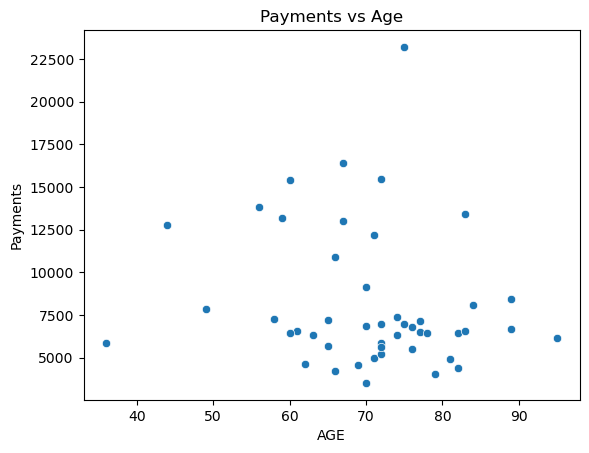

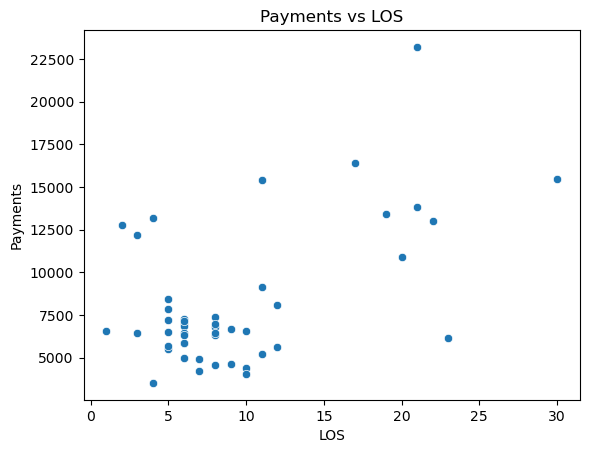

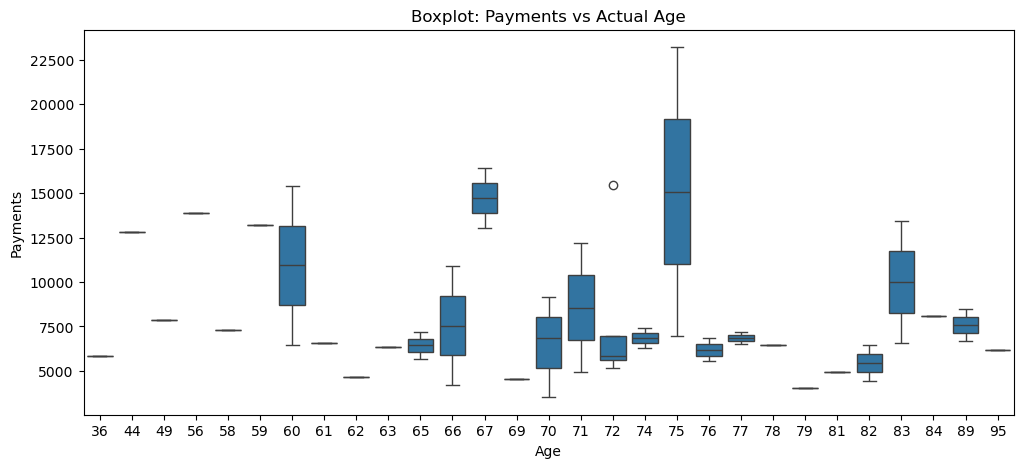

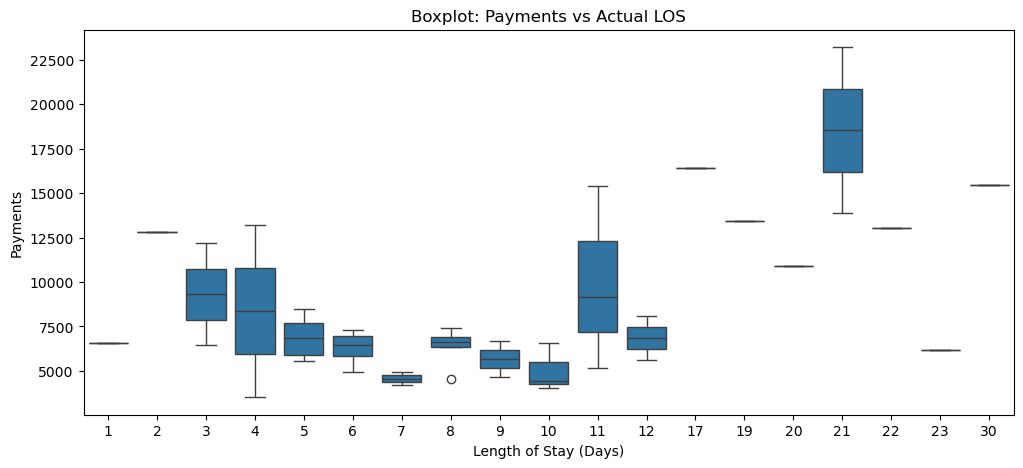

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------
# 1️⃣ Ensure numeric columns
# -------------------------------------------

df = df8.copy()

df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')
df['Payments'] = pd.to_numeric(df['Payments'], errors='coerce')

# -------------------------------------------
# 2️⃣ Correlations (Payments vs AGE & LOS)
# -------------------------------------------

corr_age = df['Payments'].corr(df['AGE'], method='pearson')
corr_los = df['Payments'].corr(df['LOS'], method='pearson')

corr_age_spearman = df['Payments'].corr(df['AGE'], method='spearman')
corr_los_spearman = df['Payments'].corr(df['LOS'], method='spearman')

print("Pearson Corr - Payments vs Age:", corr_age)
print("Pearson Corr - Payments vs LOS:", corr_los)
print("Spearman Corr - Payments vs Age:", corr_age_spearman)
print("Spearman Corr - Payments vs LOS:", corr_los_spearman)

# -------------------------------------------
# 3️⃣ Scatter Plots
# -------------------------------------------

sns.scatterplot(x='AGE', y='Payments', data=df)
plt.title("Payments vs Age")
plt.show()

sns.scatterplot(x='LOS', y='Payments', data=df)
plt.title("Payments vs LOS")
plt.show()

# -------------------------------------------
# 4️⃣ Boxplot using actual AGE (continuous)
# -------------------------------------------

plt.figure(figsize=(12, 5))
sns.boxplot(x='AGE', y='Payments', data=df)
plt.title("Boxplot: Payments vs Actual Age")
plt.xlabel("Age")
plt.ylabel("Payments")
plt.show()

# -------------------------------------------
# 5️⃣ Boxplot using actual LOS (continuous)
# -------------------------------------------

plt.figure(figsize=(12, 5))
sns.boxplot(x='LOS', y='Payments', data=df)
plt.title("Boxplot: Payments vs Actual LOS")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Payments")
plt.show()


In [58]:
import pandas as pd

df = df8.copy()

# Function to detect outliers for each age group
def find_outliers(group):
    q1 = group['Payments'].quantile(0.25)
    q3 = group['Payments'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # mark outliers
    return group[(group['Payments'] < lower) | (group['Payments'] > upper)]

# Apply per AGE group
outliers_df = df.groupby('AGE', group_keys=False).apply(find_outliers)

# Show outliers
outliers_df.head()


C:\Users\Akumar\AppData\Local\Temp\5\ipykernel_7812\2696985599.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df = df.groupby('AGE', group_keys=False).apply(find_outliers)


,Payor,Client,PaymentType,Group_Type,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,LOB,PRIM_DX,B_DRG,B_PRIMDX,InitialDeterminationStatus,IDSavings,AdjustedSavings,A_PX_List,B_PX_List,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_PX_count,B_PX_count,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,PX_Set_Change_Status,total_payment,avg_payment,max_payment,min_payment,sd_payment,avg_payment_by_comb,sd_payment_by_comb,Upper_Limt,Lower_Limt,claim_status
715697,Strat,Hum,postpay,01,15457.64,582026750,WELLSTAR DOUGLAS HOSPITAL,30,854,72,MEP3I,A419,660,N136 - CC,Denied,4786.57,0,"[0T773DZ, 0T774DZ, 0T9440Z, 0TC14ZZ, 0TC74ZZ]","[0T773DZ, 0T774DZ, 0T9440Z, 0TC14ZZ, 0TC74ZZ]",N136,MCC,[R6520],CC,"[D61818, D62, E440, I4820, I69954, N179, N184]",5,5,1,7,Change A419 → N136,Change MCC → CC,Change 854 → 660,"Change ['R6520'] → ['D61818', 'D62', 'E440', 'I4820', 'I69954', 'N179', 'N184']",No Change,15457.64,15457.64,15457.64,15457.64,NaN,8156.316809,3931.564183,19951.009357,-3638.37574,Normal


In [59]:
# Apply per AGE group
outliers_df = df.groupby('LOS', group_keys=False).apply(find_outliers)

# Show outliers
outliers_df.head()

C:\Users\Akumar\AppData\Local\Temp\5\ipykernel_7812\943348638.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df = df.groupby('LOS', group_keys=False).apply(find_outliers)


,Payor,Client,PaymentType,Group_Type,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,LOB,PRIM_DX,B_DRG,B_PRIMDX,InitialDeterminationStatus,IDSavings,AdjustedSavings,A_PX_List,B_PX_List,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_PX_count,B_PX_count,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,PX_Set_Change_Status,total_payment,avg_payment,max_payment,min_payment,sd_payment,avg_payment_by_comb,sd_payment_by_comb,Upper_Limt,Lower_Limt,claim_status
668804,Strat,Hum,postpay,01,4551.82,851608328,PENN STATE HAMPDEN MEDICAL CEN,8,872,69,MEP3I,A419,603,L03115 - CC,Denied,641.74,0,[],[],L03115,MCC,[R6520],CC,"[E871, N179]",0,0,1,2,Change A419 → L03115,Change MCC → CC,Change 872 → 603,"Change ['R6520'] → ['E871', 'N179']",No Change,4551.82,4551.82,4551.82,4551.82,NaN,8156.316809,3931.564183,19951.009357,-3638.37574,Normal


#### E871

In [67]:
df9 = df7[df7['B_DX_Set'].apply(lambda x: "E871" in x)].copy()
df9.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 251124 to 856537
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Payor                       27 non-null     object 
 1   Client                      27 non-null     object 
 2   PaymentType                 27 non-null     object 
 3   Group_Type                  27 non-null     object 
 4   Payments                    27 non-null     float64
 5   Provider_ID                 27 non-null     object 
 6   HospitalName                27 non-null     object 
 7   LOS                         27 non-null     object 
 8   ADRG                        27 non-null     object 
 9   AGE                         27 non-null     object 
 10  LOB                         27 non-null     object 
 11  PRIM_DX                     27 non-null     object 
 12  B_DRG                       27 non-null     object 
 13  B_PRIMDX                    27 no

In [68]:
df9['total_payment'] = df9.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('sum')
df9['avg_payment'] = df9.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('mean')
df9['max_payment'] = df9.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('max')
df9['min_payment'] = df9.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('min')
df9['sd_payment'] = df9.groupby(['PRIM_DX', 'Provider_ID'])['Payments'].transform('std')

df9.head()

,Payor,Client,PaymentType,Group_Type,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,LOB,PRIM_DX,B_DRG,B_PRIMDX,InitialDeterminationStatus,IDSavings,AdjustedSavings,A_PX_List,B_PX_List,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_PX_count,B_PX_count,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,PX_Set_Change_Status,total_payment,avg_payment,max_payment,min_payment,sd_payment
251124,Strat,Hum,postpay,01,5594.19,000060298B,BAPTIST MEMORIAL HOSP DESOTO,5,872,66,MEP3I,A419,603,L03115 - CC,Denied,886.61,0,[],[],L03115,MCC,[R6520],CC,[E871],0,0,1,1,Change A419 → L03115,Change MCC → CC,Change 872 → 603,Change ['R6520'] → ['E871'],No Change,5594.19,5594.19,5594.19,5594.19,NaN
253066,Strat,Hum,postpay,01,7385.45,593458145N,TAMPA GENERAL HOSPITAL,8,872,74,MEP3I,A419,603,L03115 - CC,Denied,911.14,0,[],[],L03115,MCC,[R6520],CC,"[B002, E871, N179, Z6842]",0,0,1,4,Change A419 → L03115,Change MCC → CC,Change 872 → 603,"Change ['R6520'] → ['B002', 'E871', 'N179', 'Z6842']",No Change,7385.45,7385.45,7385.45,7385.45,NaN
266846,Strat,Hum,postpay,01,5204.62,000045813,LIMA MEMORIAL HOSPITAL,5,872,47,MEP3I,A419,683,N179 - CC,Denied,917.04,0,"[03HC33Z, 05HM33Z]","[03HC33Z, 05HM33Z]",N179,MCC,[R6520],CC,"[E871, E872, R579]",2,2,1,3,Change A419 → N179,Change MCC → CC,Change 872 → 683,"Change ['R6520'] → ['E871', 'E872', 'R579']",No Change,5204.62,5204.62,5204.62,5204.62,NaN
283045,Strat,Hum,postpay,01,4637.04,581123037T,REDMOND REGIONAL MEDICAL CTR,16,872,49,MEP3I,A419,603,L03115 - CC,Denied,948.10,0,[],[],L03115,MCC,[R6520],CC,"[E871, F322, I5022, Z6841]",0,0,1,4,Change A419 → L03115,Change MCC → CC,Change 872 → 603,"Change ['R6520'] → ['E871', 'F322', 'I5022', 'Z6841']",No Change,4637.04,4637.04,4637.04,4637.04,NaN
324961,Strat,Hum,postpay,01,5417.72,610445850,ST ELIZABETH HEALTHCARE,8,872,83,MER32,A419,690,N390 - CC,Denied,1541.10,0,[],[],N390,MCC,[R6520],CC,"[E871, F05, Z1623]",0,0,1,3,Change A419 → N390,Change MCC → CC,Change 872 → 690,"Change ['R6520'] → ['E871', 'F05', 'Z1623']",No Change,5417.72,5417.72,5417.72,5417.72,NaN


In [69]:
df9['avg_payment_by_comb'] = df9.groupby(['PRIM_DX'])['avg_payment'].transform('mean')
df9['sd_payment_by_comb'] = df9.groupby(['PRIM_DX'])['avg_payment'].transform('std')

df9['Upper_Limt'] = df9['avg_payment_by_comb'] + (3 * df9['sd_payment_by_comb'])
df9['Lower_Limt'] = df9['avg_payment_by_comb'] - (3 * df9['sd_payment_by_comb'])
df9['claim_status'] = np.where(
    (df9['avg_payment_by_comb'] > df9['Upper_Limt']) |
    (df9['avg_payment_by_comb'] < df9['Lower_Limt']),
    'Outlier',
    'Normal'
)
df9['claim_status'].value_counts()

claim_status
Normal    27
Name: count, dtype: int64

Pearson Corr - Payments vs Age: -0.17000867784513984
Pearson Corr - Payments vs LOS: -0.011449955634872323
Spearman Corr - Payments vs Age: -0.13309907794986212
Spearman Corr - Payments vs LOS: -0.4654411351360667


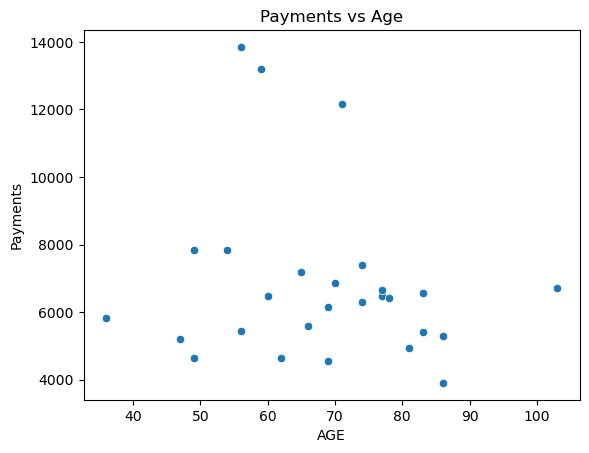

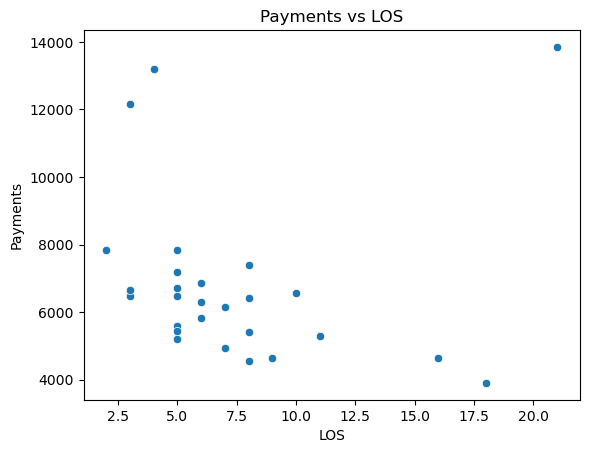

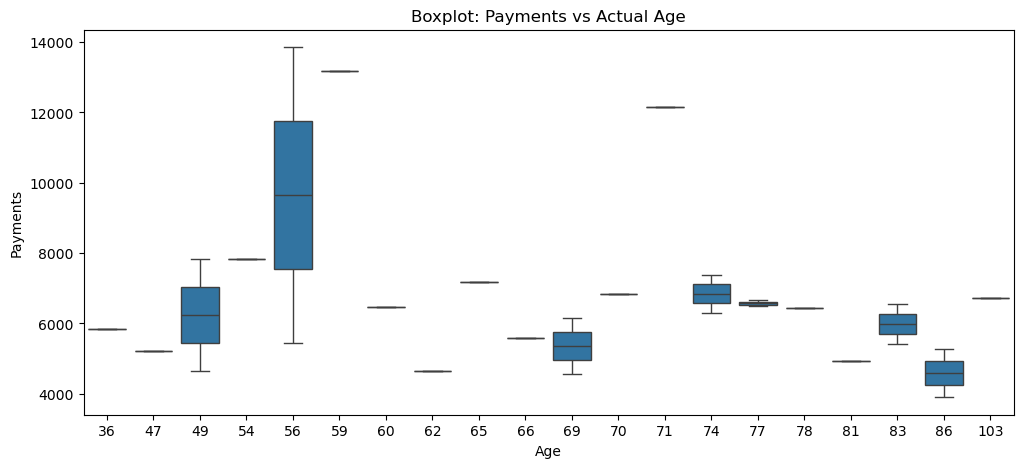

C:\Users\Akumar\AppData\Local\Temp\5\ipykernel_7812\3173883856.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df = df.groupby('AGE', group_keys=False).apply(find_outliers)


Empty DataFrame
Columns: [Payor, Client, PaymentType, Group_Type, Payments, Provider_ID, HospitalName, LOS, ADRG, AGE, LOB, PRIM_DX, B_DRG, B_PRIMDX, InitialDeterminationStatus, IDSavings, AdjustedSavings, A_PX_List, B_PX_List, B_PRIMDX_Clean, A_DX_Type, A_DX_Set, B_DX_Type, B_DX_Set, A_PX_count, B_PX_count, A_DX_Count, B_DX_Count, DX_Change_Status, DX_Type_Status, DRG_Status, DX_Set_Change_Status, PX_Set_Change_Status, total_payment, avg_payment, max_payment, min_payment, sd_payment, avg_payment_by_comb, sd_payment_by_comb, Upper_Limt, Lower_Limt, claim_status]
Index: []


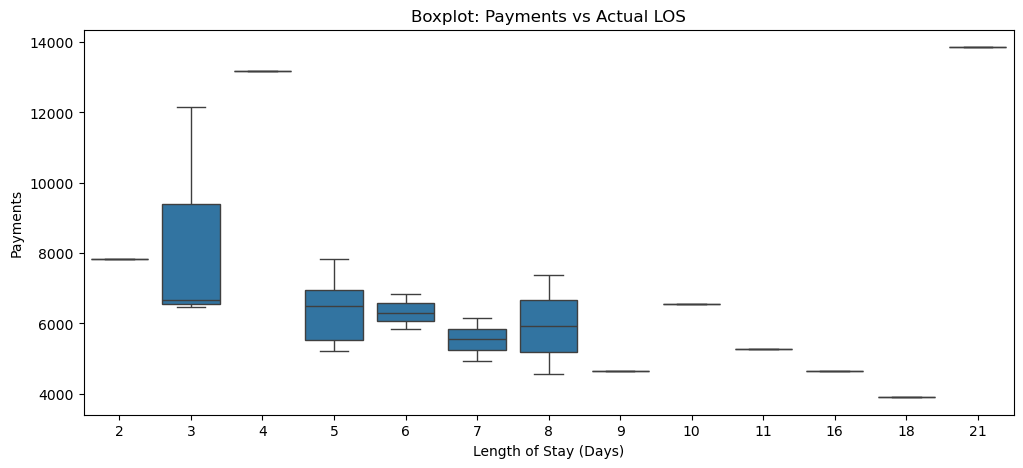

Empty DataFrame
Columns: [Payor, Client, PaymentType, Group_Type, Payments, Provider_ID, HospitalName, LOS, ADRG, AGE, LOB, PRIM_DX, B_DRG, B_PRIMDX, InitialDeterminationStatus, IDSavings, AdjustedSavings, A_PX_List, B_PX_List, B_PRIMDX_Clean, A_DX_Type, A_DX_Set, B_DX_Type, B_DX_Set, A_PX_count, B_PX_count, A_DX_Count, B_DX_Count, DX_Change_Status, DX_Type_Status, DRG_Status, DX_Set_Change_Status, PX_Set_Change_Status, total_payment, avg_payment, max_payment, min_payment, sd_payment, avg_payment_by_comb, sd_payment_by_comb, Upper_Limt, Lower_Limt, claim_status]
Index: []


C:\Users\Akumar\AppData\Local\Temp\5\ipykernel_7812\3173883856.py:82: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df1 = df.groupby('LOS', group_keys=False).apply(find_outliers)


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------
# 1️⃣ Ensure numeric columns
# -------------------------------------------

df = df9.copy()

df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')
df['Payments'] = pd.to_numeric(df['Payments'], errors='coerce')

# -------------------------------------------
# 2️⃣ Correlations (Payments vs AGE & LOS)
# -------------------------------------------

corr_age = df['Payments'].corr(df['AGE'], method='pearson')
corr_los = df['Payments'].corr(df['LOS'], method='pearson')

corr_age_spearman = df['Payments'].corr(df['AGE'], method='spearman')
corr_los_spearman = df['Payments'].corr(df['LOS'], method='spearman')

print("Pearson Corr - Payments vs Age:", corr_age)
print("Pearson Corr - Payments vs LOS:", corr_los)
print("Spearman Corr - Payments vs Age:", corr_age_spearman)
print("Spearman Corr - Payments vs LOS:", corr_los_spearman)

# Function to detect outliers for each age group
def find_outliers(group):
    q1 = group['Payments'].quantile(0.25)
    q3 = group['Payments'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # mark outliers
    return group[(group['Payments'] < lower) | (group['Payments'] > upper)]



# -------------------------------------------
# 3️⃣ Scatter Plots
# -------------------------------------------

sns.scatterplot(x='AGE', y='Payments', data=df)
plt.title("Payments vs Age")
plt.show()

sns.scatterplot(x='LOS', y='Payments', data=df)
plt.title("Payments vs LOS")
plt.show()

# -------------------------------------------
# 4️⃣ Boxplot using actual AGE (continuous)
# -------------------------------------------

plt.figure(figsize=(12, 5))
sns.boxplot(x='AGE', y='Payments', data=df)
plt.title("Boxplot: Payments vs Actual Age")
plt.xlabel("Age")
plt.ylabel("Payments")
plt.show()

# Apply per AGE group
outliers_df = df.groupby('AGE', group_keys=False).apply(find_outliers)

# Show outliers
print(outliers_df.head())
# -------------------------------------------
# 5️⃣ Boxplot using actual LOS (continuous)
# -------------------------------------------

plt.figure(figsize=(12, 5))
sns.boxplot(x='LOS', y='Payments', data=df)
plt.title("Boxplot: Payments vs Actual LOS")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Payments")
plt.show()

outliers_df1 = df.groupby('LOS', group_keys=False).apply(find_outliers)

# Show outliers
print(outliers_df1.head())